# Modeling

## Setup

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from  lightgbm import LGBMRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
import seaborn as sns
from sklearn.metrics import r2_score
from math import sqrt, pow
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
# from tensorflow import keras
# from scikeras.wrappers import KerasRegressor
# check xgboost version
import time
import os

In [145]:
#Exp 1
# train_df_sprit=pd.read_csv("../data/preprocessed/train_converted.csv", index_col=0)
# test_df_sprit=pd.read_csv("../data/preprocessed/test_converted.csv", index_col=0)


#Exp 2 
# train_df_sprit=pd.read_csv("../data/preprocessed/train_converted_experiment2.csv", index_col=0)
# test_df_sprit=pd.read_csv("../data/preprocessed/test_converted_experiment2.csv", index_col=0)


#Experiment 3
train_df_sprit=pd.read_csv("../data/preprocessed/df_range_consumption_train_data_030923.csv", index_col=0)
test_df_sprit=pd.read_csv("../data/preprocessed/df_range_consumption_test_data_030923.csv", index_col=0)
train_data=train_df_sprit.copy()
test_data=test_df_sprit.copy()

In [146]:
train_data.dropna(axis=0, inplace=True)
test_data.dropna(axis=0, inplace=True)

In [147]:
train_data.isna().sum()

power(kW)            0
quantity(kWh)        0
odometer             0
tire_type            0
city                 0
                    ..
ecr_deviation        0
trip_distance(km)    0
month                0
weekday              0
day                  0
Length: 16, dtype: int64

In [148]:
test_data.isna().sum()

power(kW)            0
quantity(kWh)        0
odometer             0
tire_type            0
city                 0
                    ..
ecr_deviation        0
trip_distance(km)    0
month                0
weekday              0
day                  0
Length: 16, dtype: int64

In [149]:
print(train_data.shape)
print(test_data.shape)

(8938, 16)
(5926, 16)


In [150]:
# Code for Volkswagen BEV
# #X_train=data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
# X_train=train_df.drop(columns=['trip_distance(km)','avg_speed(km/h)'],axis=1)
# y_train=train_df['trip_distance(km)']
# #X_test=test_data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
# X_test=test_df.drop(columns=['trip_distance(km)','avg_speed(km/h)'],axis=1)
# y_test=test_df['trip_distance(km)']

In [151]:
#X_train=data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
X_train_sprit=train_df_sprit.drop(columns=['trip_distance(km)'],axis=1)
y_train_sprit=train_df_sprit['trip_distance(km)']
#X_test=test_data.drop(columns=['trip_distance(km)', 'avg_speed(km/h)'],axis=1)
X_test_sprit=test_df_sprit.drop(columns=['trip_distance(km)'],axis=1)
y_test_sprit=test_df_sprit['trip_distance(km)']

In [152]:
X_train_sprit.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,month,weekday,day
2455,278.0,26.00,64233.0,3.0,0,1,1,1.0,20.34,0,0,4.24,7,6,15
23198,278.0,32.00,65538.0,3.0,1,0,1,1.0,20.51,0,0,4.41,7,0,30
8702,49.0,15.66,48815.0,3.0,1,0,1,1.0,10.94,0,0,-2.56,9,2,11
1875,278.0,22.00,84103.0,2.0,0,1,0,1.0,20.10,0,0,4.00,3,5,23
7435,85.0,13.33,60340.0,3.0,0,1,0,2.0,14.00,0,0,1.30,6,5,23


In [153]:
X_test_sprit.head()

,power(kW),quantity(kWh),odometer,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,ecr_deviation,month,weekday,day
10458,49.0,3.96,186903.0,3.0,1,0,0,1.0,12.65,0,0,-0.850000,6,6,30
6980,85.0,10.91,78909.0,2.0,0,0,1,1.0,16.50,0,1,3.800000,11,4,16
6114,85.0,8.68,32386.0,2.0,0,1,0,2.0,15.40,0,1,2.700000,12,2,6
1972,278.0,32.00,85628.0,2.0,1,0,1,1.0,22.98,0,0,6.880000,4,2,10
17000,88.0,2.42,53744.0,3.0,1,0,0,2.0,18.80,0,0,2.366159,1,3,21


# Machine Learning 

In [154]:
import os

### Evaluation Methods

In [155]:
def plotresults(y_test, y_pred_test, tittle):
    x_axis=range(len(y_test))
    plt.figure(figsize=(5,5))
    plt.plot(x_axis, y_test, linewidth=1, label="Actual Values" )
    plt.plot(x_axis, y_pred_test, linewidth=1.1, label="Predicted Values")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.xlabel('Number of Trips', weight='bold', size=8)
    plt.ylabel('Trip Distance', weight='bold',size=8)
    plt.title(tittle,weight='bold',size=10)
    plt.xticks(weight='bold', size=7)
    plt.yticks(weight='bold', size=7)
    plt.grid(True)
    plt.show()

In [156]:

def calulate_metrics(y_test, y_pred_test):
    mse=  format(mean_squared_error(np.array(y_test), y_pred_test, squared=False),'.4f')
    rmse = format(np.sqrt(mean_squared_error(np.array(y_test), y_pred_test, squared=False)), '.4f')
    mae= format(mean_absolute_error(np.array(y_test), y_pred_test),'.4f')
    r2=format(r2_score(y_test,y_pred_test),'.4f')
    return mse, rmse, mae, r2


In [157]:
def evaluate_metrics(y_test, X_test,regressor_model, tittle, timetaken):
    y_pred_test=regressor_model.predict(X_test)
    mse, rmse,mae,r2=calulate_metrics(np.round(y_test,6), np.round(y_pred_test,6))
    print('Y pred Mean',round(y_pred_test.mean(),6))
    print('MSE',mse)
    print('RMSE', rmse)
    print('MAE', mae)
    print('R2',r2)
    print('timetaken', timetaken)
    results={}
    results['Model Name']=tittle
    results['Y Mean']=y_test.mean()
    results['Y Pred Mean']=y_pred_test.mean()
    results['MSE']=mse
    results['RMSE']=rmse
    results['MAE']=mae
    results['R2']=r2
    results['Excution Time']=timetaken
  

    
    path="../reports/results_032023.xlsx"
    res_new=pd.DataFrame(results, index=[0])
    
     # read file 
    if os.path.exists(path):
        res_old=pd.read_excel(path)
        if res_old.shape[0]>=0:
            print('file exists')
            print("shape before",res_old.shape)
            new_df=pd.concat([res_old,res_new])
            print("shape after",new_df.shape)
            new_df.to_excel(path,header=True,index=False)

    else:
        res_new.to_excel(path,header=True,index=False)
    plotresults(y_test, y_pred_test, tittle)
    return y_pred_test

In [158]:
def DistributionPlot(y_test, y_pred, Title):
    plt.figure(figsize=(4, 4))
    ax1 = sns.distplot(y_test, label='Actual values',hist=False )
    ax2 = sns.distplot(y_pred,  label='Predicted Values',hist=False)
    plt.title(Title,weight='bold', size=10)
    plt.xlabel('Trip Distance', weight='bold', size=8)
    plt.ylabel('Density',weight='bold', size=8)
    plt.xticks( weight='bold', size=7)
    plt.yticks( weight='bold', size=7)
    plt.legend()
    plt.show()
    plt.close()

## Decission Tree 


### Base model 

In [159]:
def decisionTree(X_train, y_train, X_test, y_test):
    start_time = time.time()
    dectreeRegModel=DecisionTreeRegressor()
    dectreeRegModel.fit(pd.DataFrame(X_train), np.ravel(y_train))
    timetaken=(time.time() - start_time)
    y_pred_deci=evaluate_metrics(y_test,X_test, dectreeRegModel, 'Base Decission Tree results',timetaken)
    #export_graphviz(dectreeRegModel, out_file ='../reports/tree_structure.dot', 
       #        feature_names =X_train_sprit.columns)
    return dectreeRegModel, y_test_sprit,y_pred_deci

In [160]:
print('y_test_sprit',round(y_test_sprit.mean(),6))

y_test_sprit 72.495731


Y pred Mean 72.484695
MSE 36.8792
RMSE 6.0728
MAE 17.6393
R2 0.4764
timetaken 0.12292599678039551
file exists
shape before (24, 8)
shape after (25, 8)


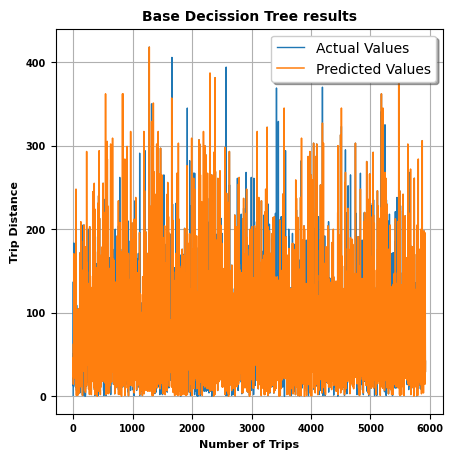

In [161]:
dectreeRegModel,y_test_sprit, y_pred_deci=decisionTree(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

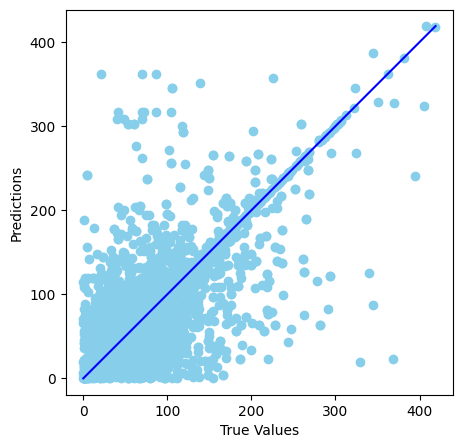

In [162]:
plt.figure(figsize=(5,5))
plt.scatter(y_test_sprit, y_pred_deci, c='skyblue')
# plt.yscale('log')
# plt.xscale('log')
p1 = max(max(y_pred_deci), max(y_test_sprit))
p2 = min(min(y_pred_deci), min(y_test_sprit))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=10)
plt.ylabel('Predictions', fontsize=10)
plt.axis('equal')
plt.show()

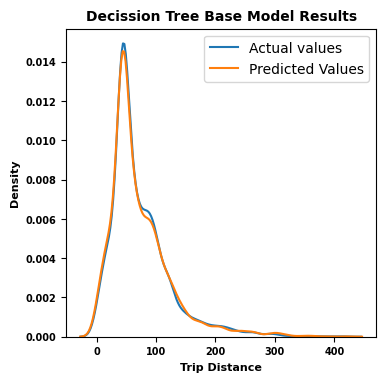

In [163]:
import warnings
warnings.filterwarnings('ignore')
DistributionPlot(y_test_sprit, y_pred_deci, 'Decission Tree Base Model Results')

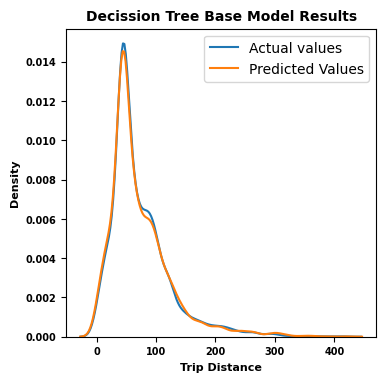

In [164]:
DistributionPlot(y_test_sprit, y_pred_deci, 'Decission Tree Base Model Results')

### Tuning parameters

In [165]:
pd.set_option('display.max_rows', 10)
def runTunedDecFor(X_train, y_train, X_test, y_test):
    params_grid={
            'max_depth':[ i for i in range(1,10)],
            'min_samples_leaf': [ i for i in range(1,8)],
            'min_samples_split': [ i for i in range(2,10)],
            'criterion': ['squared_error','absolute_error'],
            'splitter':['best', 'random'],
            'max_features':['sqrt','log2']}
    
    
    skfold= StratifiedKFold(n_splits=5, shuffle=True)
    start_time = time.time()
    dec_cv=DecisionTreeRegressor()
    dec_random = RandomizedSearchCV(estimator = dec_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #rf_random.fit(pca_train[:,:6],np.ravel(y_train))
    dec_random.fit(X_train,np.ravel(y_train))
    endtime= time.time()-start_time
    y_pred=evaluate_metrics(y_test,X_test,dec_random, 'Tuned DecisionTree',endtime)
    return dec_random, y_test, y_pred

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, max_features=log2, min_samples_leaf=7, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   0.0s
[CV] END criterion=squared_error, max_depth=6, max_features=sqrt, min_samples_leaf=2, m

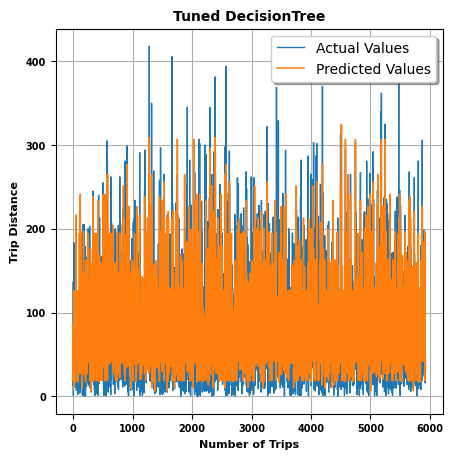

In [166]:
dec_random,y_test, y_pred=runTunedDecFor(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [167]:
dec_random.best_params_

{'splitter': 'best',
 'min_samples_split': 4,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 9,
 'criterion': 'squared_error'}

In [168]:
pd.set_option('display.max_columns', 30)

In [169]:
dec_random.best_params_
cv_res=pd.DataFrame(dec_random.cv_results_)
cv_res[cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,0.010059,0.000707,0.002479,0.000192,best,4,6,log2,9,squared_error,"{'splitter': 'best', 'min_samples_split': 4, '...",0.541217,0.547795,0.530117,0.503299,0.431503,0.510786,0.042453,1


In [170]:
# import matplotlib.pyplot as plt2
# from sklearn.tree import plot_tree

# plot_tree(dectreeRegModel, 
#            feature_names=X_train_sprit.columns)
# plt.show()

In [171]:
# X_test_pc = pca.transform(scalled_X_test)

## Random Forest

### 1.Base Model

In [172]:
# rf=RandomForestRegressor(n_estimators=1000)
# rf_model=rf.fit(pca_train[:,:6],np.ravel(y_train))
def runRandonForest(X_train, y_train, X_test, y_test):
    start_time = time.time()
    rf=RandomForestRegressor(n_estimators=100)
    rf_model=rf.fit(X_train,np.ravel(y_train))
    timetaken=  time.time()-start_time
    y_pred_rf_base=evaluate_metrics(y_test,X_test,rf_model, 'Base RandomForest results',timetaken)
    return rf_model,y_pred_rf_base

In [173]:
#runRandonForest(X_kmeans_train_1, y_kmeans_train_1, X_kmeans_test_1, y_kmeans_test_1)

Y pred Mean 73.000673
MSE 26.3076
RMSE 5.1291
MAE 14.3848
R2 0.7336
timetaken 3.523064374923706
file exists
shape before (26, 8)
shape after (27, 8)


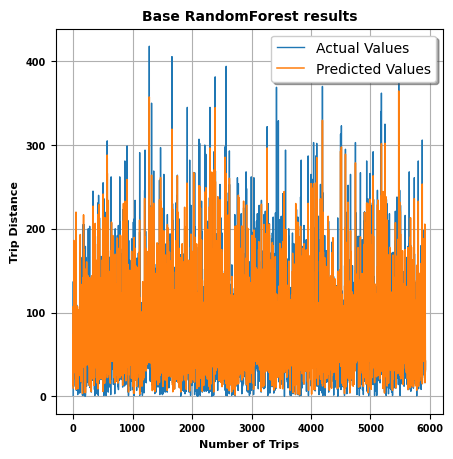

In [174]:
rf_model,y_pred_rf_base=runRandonForest(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [175]:
# def plotresultsbar(y_test,y_pred_test):
#     fig1=plt.figure(figsize=(5,4))
#     plt.bar(X_test['power(kW)'],y_test, color='red', label='y_test')
#     plt.bar(X_test['power(kW)'],y_pred_test, color='blue', label='y_pred_test')
#     plt.ylim([0,500])
#     plt.xlabel('power')
#     plt.ylabel('Range')
#     plt.title(' Range versus power')
#     plt.show()


In [176]:
# def plotlinegraph(y_test, y_pred_test):
#     fig1=plt.figure(figsize=(5,4))
#     sns.lineplot(x=X_test['power(kW)'],y=y_test, color='red', label='y_test')
#     sns.lineplot(x=X_test['power(kW)'],y=y_pred_test, color='blue', label='y_pred_test')
#     plt.ylim([0,500])
#     plt.xlabel('power')
#     plt.ylabel('Range')
#     plt.title(' Range versus power')
#     plt.show()


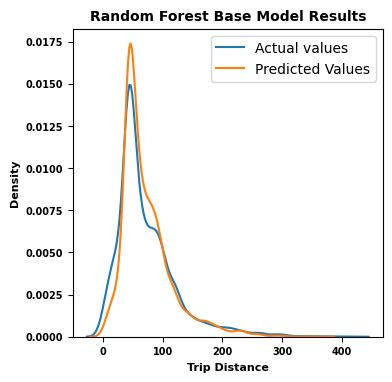

In [177]:
import warnings
warnings.filterwarnings('ignore')
DistributionPlot(y_test_sprit, y_pred_rf_base, 'Random Forest Base Model Results')

In [178]:
Prediction_results=pd.DataFrame()

In [179]:
Prediction_results['Y_Test']=y_test_sprit
Prediction_results['Y_Pred_RF']=y_pred_rf_base

In [180]:
Prediction_results.to_csv("../reports/Resultscomparision.csv")

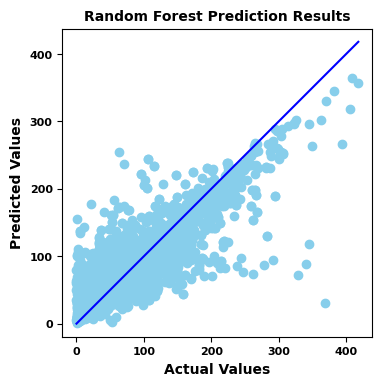

In [181]:
plt.figure(figsize=(4,4))
plt.scatter(y_test_sprit, y_pred_rf_base, c='skyblue')
# plt.yscale('log')
# plt.xscale('log')
p1 = max(max(y_pred_rf_base), max(y_test_sprit))
p2 = min(min(y_pred_rf_base), min(y_test_sprit))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Random Forest Prediction Results', fontsize=10, weight='bold')
plt.xlabel('Actual Values', fontsize=10, weight='bold')
plt.ylabel('Predicted Values', fontsize=10,weight='bold')
plt.xticks( fontsize=8, weight='bold')
plt.yticks( fontsize=8, weight='bold')
plt.axis('equal')
plt.show()

In [182]:
# plt.figure(figsize=(4,4))
# plt.scatter( X_train_sprit['consumption(kWh/100km)'],X_train_sprit['quantity(kWh)'], c='skyblue',hue='tire_tpe')
# plt.title('Random Forest Prediction Results', fontsize=10, weight='bold')
# plt.ylabel('quantity(kWh)', fontsize=10, weight='bold')
# plt.xlabel('consumption(kWh/100km)', fontsize=10,weight='bold')
# plt.xticks( fontsize=8, weight='bold')
# plt.yticks( fontsize=8, weight='bold')
# plt.axis('equal')
# plt.show()

In [183]:
X_train_sprit.columns

Index(['power(kW)', 'quantity(kWh)', 'odometer', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'ecr_deviation', 'month', 'weekday', 'day'],
      dtype='object')

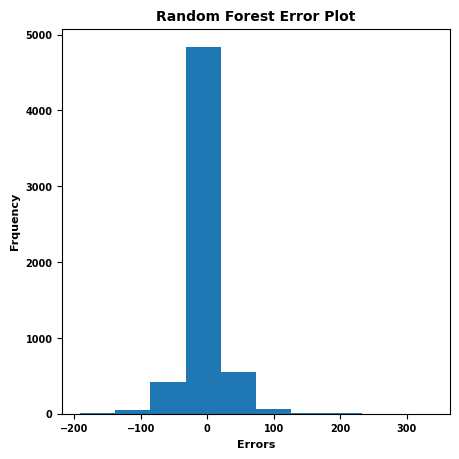

In [184]:
plt.figure(figsize=(5,5))
plt.hist((y_test_sprit - y_pred_rf_base))
plt.title('Random Forest Error Plot', size=10, weight='bold')
plt.xlabel('Errors', size=8, weight='bold')
plt.ylabel('Frquency', size=8,weight='bold')
plt.xticks( size=7, weight='bold')
plt.yticks( size=7, weight='bold')
plt.show()

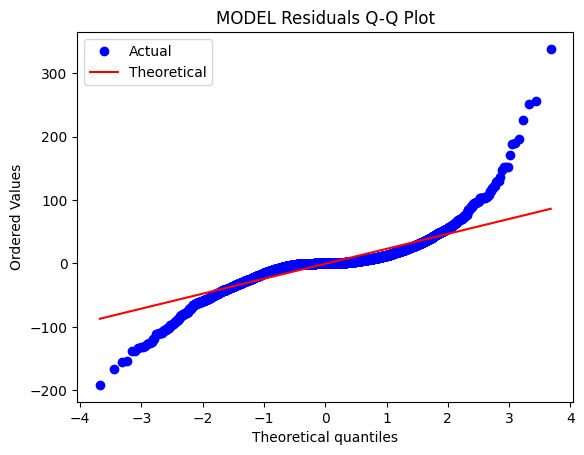

In [185]:
#Import library
from scipy import stats
stats.probplot((y_test_sprit - y_pred_rf_base), dist="norm", plot= plt)
plt.title("MODEL Residuals Q-Q Plot")
plt.legend(['Actual','Theoretical'])

In [186]:
# plt.plot(np.abs(y_test_sprit - y_pred_rf_base) ,marker='o',linestyle='')

<BarContainer object of 15 artists>

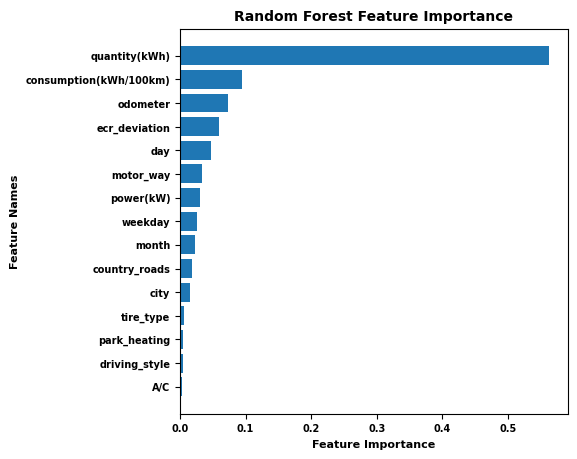

In [187]:
plt.figure(figsize=(5,5))
plt.title('Random Forest Feature Importance', weight='bold', size=10)
plt.xlabel('Feature Importance', weight='bold', size=8)
plt.ylabel("Feature Names", weight='bold', size=8)
plt.xticks(weight='bold', size=7)
plt.yticks(weight='bold', size=7)
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X_train_sprit.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])


###  Tuned Random Forest

In [188]:
pd.set_option('display.max_rows', 10)
rf_cv=RandomForestRegressor()
skfold= StratifiedKFold(n_splits=5, shuffle=True)

In [189]:
y_test.mean()

72.49573067836653

In [190]:
def runTunedRanFor(X_train, y_train, X_test, y_test):
    params_grid={
            'n_estimators': [i for i in range(1,150)],
            'bootstrap': [True, False],
            'max_depth':[ i for i in range(1,14)],
            'min_samples_leaf': [ i for i in range(1,10)],
            'min_samples_split': [ i for i in range(2,10)],
            'criterion': ['squared_error'] }
    start_time=time.time()
    rf_cv=RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = params_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #rf_random.fit(pca_train[:,:6],np.ravel(y_train))
    rf_model=rf_random.fit(X_train,np.ravel(y_train))
    timetaken=time.time()-start_time
    y_prd=evaluate_metrics(y_test,X_test,rf_model, 'RandomForest Tree results',timetaken)
    return rf_model, y_test, y_prd

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=False, criterion=squared_error, max_depth=1, min_samples_leaf=7, min_samples_split=3, n_estimators=103; total time=   0.5s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, min_samples_split=4, n_estimators=77; total time=   2.1s
[CV] END bootstrap=True, criterion=squared_error, max_depth=12, min_samples_leaf=4, mi

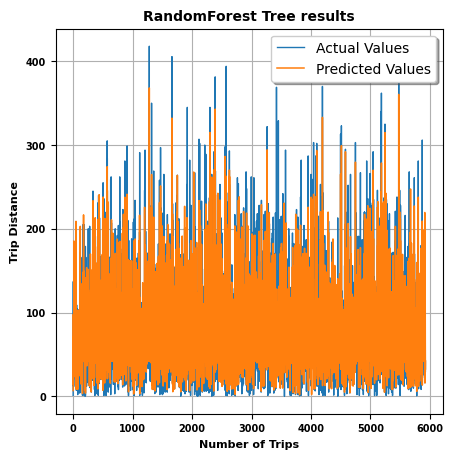

In [191]:
#runTunedRanFor(X_kmeans_train, y_kmeans_train, X_kmeans_test, y_kmeans_test)
rf_model,y_test, y_prd=runTunedRanFor(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [192]:
rf_model.best_params_

{'n_estimators': 130,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 13,
 'criterion': 'squared_error',
 'bootstrap': True}

In [193]:
cv_res=pd.DataFrame(rf_model.cv_results_)
cv_res[cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
90,4.046757,0.008416,0.047299,0.003284,130,5,1,13,squared_error,True,"{'n_estimators': 130, 'min_samples_split': 5, ...",0.737338,0.679282,0.697202,0.701895,0.697004,0.702544,0.019034,1


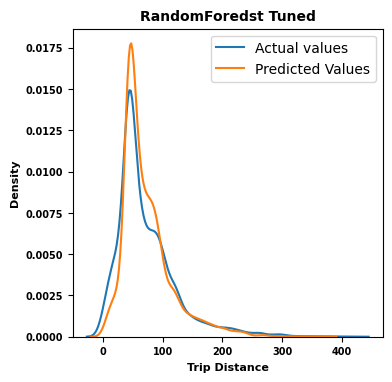

In [194]:
DistributionPlot(y_test_sprit, y_prd, 'RandomForedst Tuned')

## XGBoost

### Basic Model 

In [195]:
y_test_sprit.mean()

72.49573067836653

In [196]:
def runXGboost(X_train, y_train, X_test, y_test):  
    # Instantiation
    start_time = time.time()
    params = {'objective':'reg:squarederror' } 
    xgb_r = xgb.XGBRegressor(**params)
    # Fitting the model
    #xgb_r.fit(pca_train[:,:6],np.ravel(y_train))
    xgb_r.fit(X_train,np.ravel(y_train))
    timetaken= time.time()-start_time 
    evaluate_metrics(y_test,X_test,xgb_r,'Base XGB Analysis',timetaken)
    return xgb_r

Y pred Mean 72.69031
MSE 28.1565
RMSE 5.3063
MAE 16.0973
R2 0.6948
timetaken 0.37818431854248047
file exists
shape before (28, 8)
shape after (29, 8)


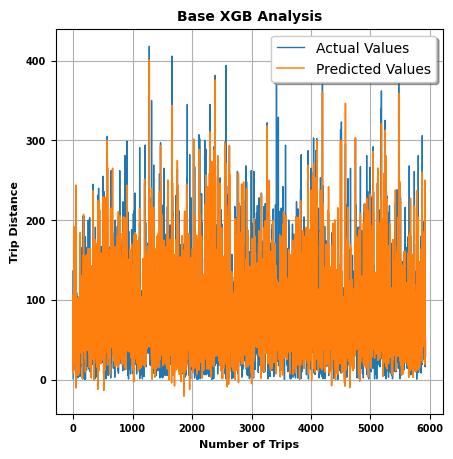

In [197]:
xgb_r=runXGboost(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)


### 2. Tuning Params 

In [207]:
def tunedXGBoost(X_train, y_train, X_test, y_tets):
    skf = StratifiedKFold(n_splits=5,
                        shuffle=True, 
                        random_state=0)
    space={   
        'objective':['reg:squarederror'],
        'max_depth': [1, 2,3,4,5,6,7,8,9,10],
        'n_estimators': [i for i in range(1,200)],
            'learning_rate':[0.01,0.1, 1.0] ,
            'subsample':[0.5,.6,.7,0.8],  
            'eta':[0.1],
            'lambda':[0.01],
            'booster':['gbtree']
        }
    start_time=time.time()
    xgb_r_tun = xgb.XGBRegressor( )
    xgb_cv = RandomizedSearchCV(estimator=xgb_r_tun,param_distributions=space, cv=5,n_iter=100)
    #xgb_cv=xgb_cv.fit(pca_train[:,:6], y_train)
    xgb_cv.fit(X_train, y_train)
    timetaken=  time.time()-start_time
    y_pred_test=evaluate_metrics(y_test_sprit,X_test_sprit,xgb_cv,'XGB Tuned',timetaken )
    return xgb_cv,y_test_sprit,y_pred_test,timetaken

Y pred Mean 72.94271
MSE 26.9892
RMSE 5.1951
MAE 14.8081
R2 0.7196
timetaken 157.9942228794098
file exists
shape before (30, 8)
shape after (31, 8)


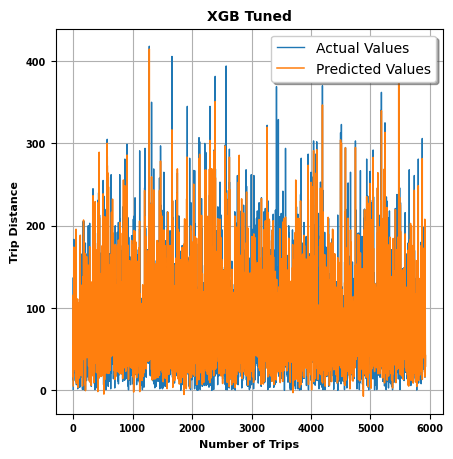

In [208]:
xgb_cv,y_test_sprit,y_pred_test_xgb,timetaken=tunedXGBoost(X_train_sprit, y_train_sprit, y_test_sprit, X_test_sprit)

In [200]:
xgb_cv.best_params_


{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'n_estimators': 70,
 'max_depth': 10,
 'learning_rate': 0.1,
 'lambda': 0.01,
 'eta': 0.1,
 'booster': 'gbtree'}

In [201]:
xgv_cv_res=pd.DataFrame(xgb_cv.cv_results_)
xgv_cv_res[xgv_cv_res.rank_test_score==1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_objective,param_n_estimators,param_max_depth,param_learning_rate,param_lambda,param_eta,param_booster,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
25,0.5595,0.006309,0.003554,0.000134,0.7,reg:squarederror,70,10,0.1,0.01,0.1,gbtree,"{'subsample': 0.7, 'objective': 'reg:squareder...",0.736381,0.698681,0.691413,0.705846,0.69016,0.704496,0.016905,1


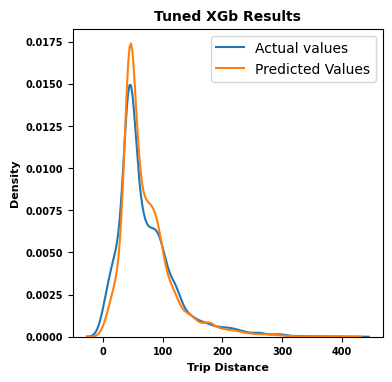

In [203]:
DistributionPlot(y_test_sprit, y_pred_test_xgb, 'Tuned XGb Results')

In [ ]:
# def report_performance(optimizer, X, y, title="model"):
#     start = time()
#     optimizer.fit(X, y)
        
#     d=pd.DataFrame(optimizer.cv_results_)
#     best_score = optimizer.best_score_
#     best_score_std = d.iloc[optimizer.best_index_].std_test_score
#     best_params = optimizer.best_params_
#     print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
#            + u"\u00B1"+" %.3f") % (time() - start, 
#                                    len(optimizer.cv_results_['params']),
#                                    best_score,
#                                    best_score_std))    
#     print('Best parameters:')
#     print()
#     return best_params

In [ ]:
score=pd.DataFrame(xgb_cv.cv_results_).query('rank_test_score==1')

In [ ]:
score

Y pred Mean 72.94271
MSE 26.9892
RMSE 5.1951
MAE 14.8081
R2 0.7196
timetaken 157.9942228794098
file exists
shape before (31, 8)
shape after (32, 8)


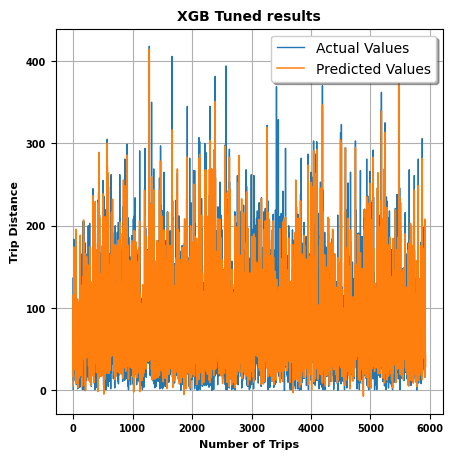

array([ 5.5846634, 47.575264 , 58.949512 , ..., 35.2422   , 28.519936 ,
       42.54388  ], dtype=float32)

In [210]:
evaluate_metrics(y_test, X_test_sprit, xgb_cv.best_estimator_, 'XGB Tuned results',timetaken)

In [ ]:
search_spaces = {'learning_rate': Real(0.01, 1.0, 'uniform'),
                 'max_depth': Integer(2, 12),
                 'subsample': Real(0.1, 1.0, 'uniform'),
                 'colsample_bytree': Real(0.1, 1.0, 'uniform'), # subsample ratio of columns by tree
                 'reg_lambda': Real(1e-9, 100., 'uniform'), # L2 regularization
                 'reg_alpha': Real(1e-9, 100., 'uniform'), # L1 regularization
                 'n_estimators': Integer(50, 5000)
        

In [ ]:
# from bayes_opt import BayesianOptimization
# # Gradient Boosting Machine
# def gbm_cl_bo(max_depth, max_features, learning_rate, n_estimators, subsample):
#     params_gbm = {}
#     params_gbm['max_depth'] = round(max_depth)
#     params_gbm['max_features'] = max_features
#     params_gbm['learning_rate'] = learning_rate
#     params_gbm['n_estimators'] = round(n_estimators)
#     params_gbm['subsample'] = subsample
#     xgb_r = xgb.XGBRegressor( objective='reg:squarederror', )
#     scores = cross_val_score(GradientBoostingClassifier(random_state=123, **params_gbm),
#                              X_train, y_train, scoring=acc_score, cv=5).mean()
#     score = scores.mean()
#     return score
# # Run Bayesian Optimization
# start = time.time()
# params_gbm ={
#     'max_depth':(3, 10),
#     'max_features':(0.8, 1),
#     'learning_rate':(0.01, 1),
#     'n_estimators':(80, 150),
#     'subsample': (0.8, 1)
# }
# gbm_bo = BayesianOptimization(gbm_cl_bo, params_gbm, random_state=111)
# gbm_bo.maximize(init_points=20, n_iter=4)
# print('It takes %s minutes' % ((time.time() - start)/60))

## Light GBM 

In [213]:
def runLightGBM(X_train, y_train, X_test, y_test):
    starttime=time.time()
    lgbm_model=LGBMRegressor( objective = "regression")
    #lgbm_model.fit(pca_train[:,:6],np.ravel(y_train))
    lgbm_model.fit(X_train,np.ravel(y_train))
    timetaken= time.time()-starttime
    y_pred_test=evaluate_metrics(y_test, X_test, lgbm_model, 'Base LightGBM Results',timetaken)
    return y_pred_test, lgbm_model,timetaken

Y pred Mean 72.725088
MSE 28.1721
RMSE 5.3077
MAE 16.4948
R2 0.6945
timetaken 0.09165573120117188
file exists
shape before (33, 8)
shape after (34, 8)


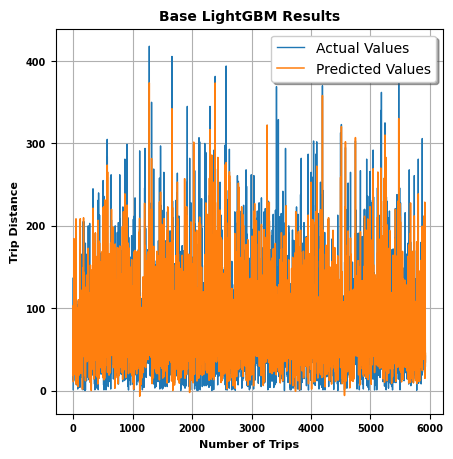

In [214]:
y_pred_test_lgbm,lgbm_model,timetaken=runLightGBM(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

### Tune Light GBM

In [215]:
def tunedLightGBM(X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5,
                        shuffle=True, 
                        random_state=0)
    space = {
        "objective" : ["regression"],
        "metric" :[ "mae"],
        'boosting_type': ['gbdt'],
      
         "max_depth": [5, 6,7, 8],
         "learning_rate" : [0.005, 0.01, 0.02, 0.1],
        'min_child_samples': [2,5,10,20],
        'n_estimators': [i for i in range(50,500)],
        'num_leaves': [i for i in range(20,50)],
         'min_child_weight':[ 0.001, 0.002,0.003],
         "bagging_seed" :[ 42]
     

    }    
    lgbm_model=LGBMRegressor( objective = "regression")
    start_time=time.time()
    lgbm_cv = RandomizedSearchCV(estimator=lgbm_model,param_distributions=space, cv=5,n_iter=100)
    lgbm_cv=lgbm_cv.fit(X_train, y_train)
    endtime=time.time()-start_time
    y_pred=evaluate_metrics(y_test, X_test, lgbm_cv, 'LightGBM Results', endtime)
    return lgbm_cv, y_test_sprit, y_pred

Y pred Mean 72.771204
MSE 27.4690
RMSE 5.2411
MAE 15.5521
R2 0.7095
timetaken 104.7261426448822
file exists
shape before (34, 8)
shape after (35, 8)


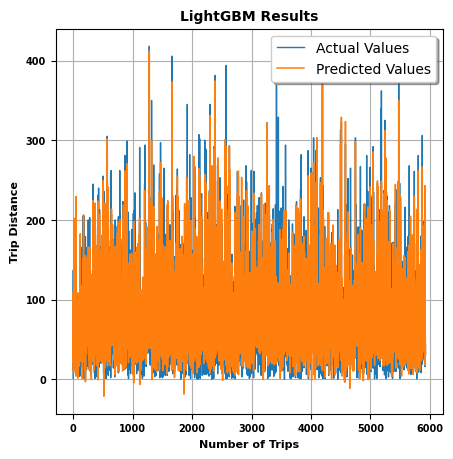

In [216]:
lgbm_cv, y_test_sprit,y_pred_lgb=tunedLightGBM(X_train_sprit, y_train_sprit, X_test_sprit, y_test_sprit)

In [220]:
# path2 ="../reports/Resultscomparision.csv"
# resultscomp=pd.read_csv(path2)
# resultscomp['Y_Pred_LGBM']=y_pred_lgb
# resultscomp.to_csv(path2)

In [ ]:
lgbm_cv.best_params_

{'objective': 'regression',
 'num_leaves': 23,
 'n_estimators': 288,
 'min_child_weight': 0.002,
 'min_child_samples': 10,
 'metric': 'mse',
 'max_depth': 8,
 'learning_rate': 0.02,
 'boosting_type': 'gbdt',
 'bagging_seed': 42}